In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input

In [5]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
df['Amount']=StandardScaler().fit_transform(df[['Amount']])
df=df.drop(['Time'],axis=1)

In [11]:
df.shape

(284807, 30)

In [12]:
x=df.drop(['Class'],axis=1)
y=df['Class']

df.shape
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train_normal=x_train[y_train==0]
x_test_normal=x_test[y_test==0]
x_test_fraud=x_test[y_test==1]

In [17]:
input_dim=x_train_normal.shape[1]

input_layer=Input(shape=(input_dim,))

encoder=Dense(20,activation='tanh')(input_layer)
encoder=Dense(10,activation='relu')(encoder)
encoder=Dense(4,activation='relu')(encoder)

decoder=Dense(10,activation='relu')(encoder)
decoder=Dense(20,activation='tanh')(decoder)
output_layer=Dense(input_dim,activation='relu')(decoder)

autoencoder=Model(inputs=input_layer,outputs=output_layer)
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 20)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4)                   │              44 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 29)                  │             609 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,733 (6.77 KB)

 Trainable params: 1,733 (6.77 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [20]:
his=autoencoder.fit(x_train_normal,x_train_normal,validation_data=(x_test_normal,x_test_normal),epochs=10,batch_size=32,shuffle=True)

Epoch 1/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.5711 - loss: 0.8142 - val_accuracy: 0.6289 - val_loss: 0.7497
Epoch 2/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.6340 - loss: 0.7614 - val_accuracy: 0.6366 - val_loss: 0.7348
Epoch 3/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.6416 - loss: 0.7516 - val_accuracy: 0.6489 - val_loss: 0.7295
Epoch 4/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.6477 - loss: 0.7468 - val_accuracy: 0.6536 - val_loss: 0.7248
Epoch 5/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.6530 - loss: 0.7431 - val_accuracy: 0.6503 - val_loss: 0.7225
Epoch 6/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.6571 - loss: 0.7403 - val_accuracy: 0.6637 - val_loss: 0.7205
Epoch 7/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.6622 - loss: 0.7382 - val_accuracy: 0.6643 - val_loss: 0.7191
Epoch 8/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.6647 - loss: 0

In [21]:
reconstruction=autoencoder.predict(x_test)
mse=np.mean(np.power(x_test-reconstruction,2),axis=1)

threshold=np.percentile(mse,95)
print("Threshold: ",threshold)

y_pred=[1 if e>threshold else 0 for e in mse]

print("accuracy score: ",accuracy_score(y_test,y_pred))
print("Classification Report: ",classification_report(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))
print("Roc-AUC score: ",roc_auc_score(y_test,y_pred))



1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Threshold:  1.6300850306635366
accuracy score:  0.9512130894280397
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.86      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.52     56962
weighted avg       1.00      0.95      0.97     56962

Confusion Matrix:  [[54099  2765]
 [   14    84]]
Roc-AUC score:  0.9042590340863413


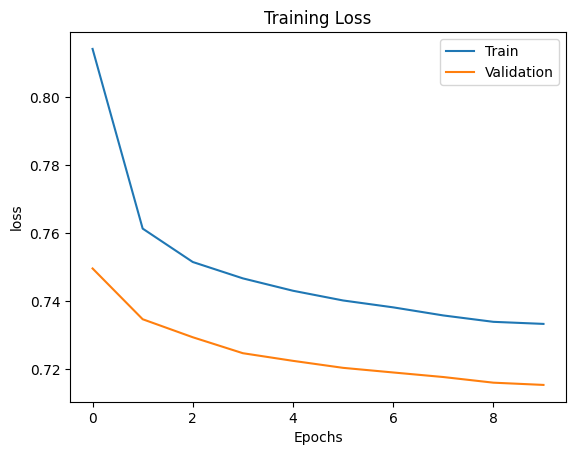

In [25]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title("Training Loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [28]:
import random
n=random.randint(0,len(x_test_fraud))
sample_trans=x_test_fraud[n:n+1]

reconstructed=autoencoder.predict(sample_trans)
mse_sample=np.mean(np.power(x_test-reconstructed,2))
if mse_sample > threshold:
    print("Fraudulent Transaction")
else:
    print("Legitimate Transaction")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Reconstructed MSE: 1.7197872637732126
Fraudulent Transaction
